## Abstract

Dataset of airbnb datas from Rome from the webpahe inside airbnb.

## Import packages

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


## Load dataset

In [8]:
df = pd.read_csv('data/listings_Rome.csv')

In [10]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,256695,https://www.airbnb.com/rooms/256695,20230315024350,2023-03-15,city scrape,Trastevere color-suite,<b>The space</b><br />Apartment totally new in...,NaN,https://a0.muscache.com/pictures/4543522/a51fe...,1350540,...,4.99,4.95,4.91,NaN,t,1,1,0,0,1.54
1,258330,https://www.airbnb.com/rooms/258330,20230315024350,2023-03-15,city scrape,"Sunny with view, WiFi, A/C. Metro, Airport train.","Naturally lit apartment with Wi-Fi, flat-scree...",The apartment is located in the Tuscolano-San ...,https://a0.muscache.com/pictures/b6804ab8-3bc6...,1358462,...,4.99,4.60,4.75,NaN,t,1,1,0,0,0.55
2,137044,https://www.airbnb.com/rooms/137044,20230315024350,2023-03-15,city scrape,In Campo de 'Fiori! For families and friends i...,Your home in Rome! Located in the center of Ro...,This area is a key component of the historic ...,https://a0.muscache.com/pictures/prohost-api/H...,670337,...,4.74,4.90,4.35,NaN,t,1,1,0,0,1.02
3,137157,https://www.airbnb.com/rooms/137157,20230315024350,2023-03-15,city scrape,Super balcony in center on Romans roofs,<b>The space</b><br />Fantastic apartment with...,NaN,https://a0.muscache.com/pictures/867987/95ef7c...,486866,...,4.75,4.75,4.50,NaN,f,5,5,0,0,0.04
4,259075,https://www.airbnb.com/rooms/259075,20230315024350,2023-03-15,city scrape,"City Center: Large, Chic, Modern apartment","Renovated in January 2020, new, wide, ideal f...",City Center-Walking distance from the major po...,https://a0.muscache.com/pictures/810f6a92-b702...,1311777,...,4.89,4.71,4.68,ATR 003602\nCodice identificativo id869,t,2,2,0,0,1.29


<Axes: >

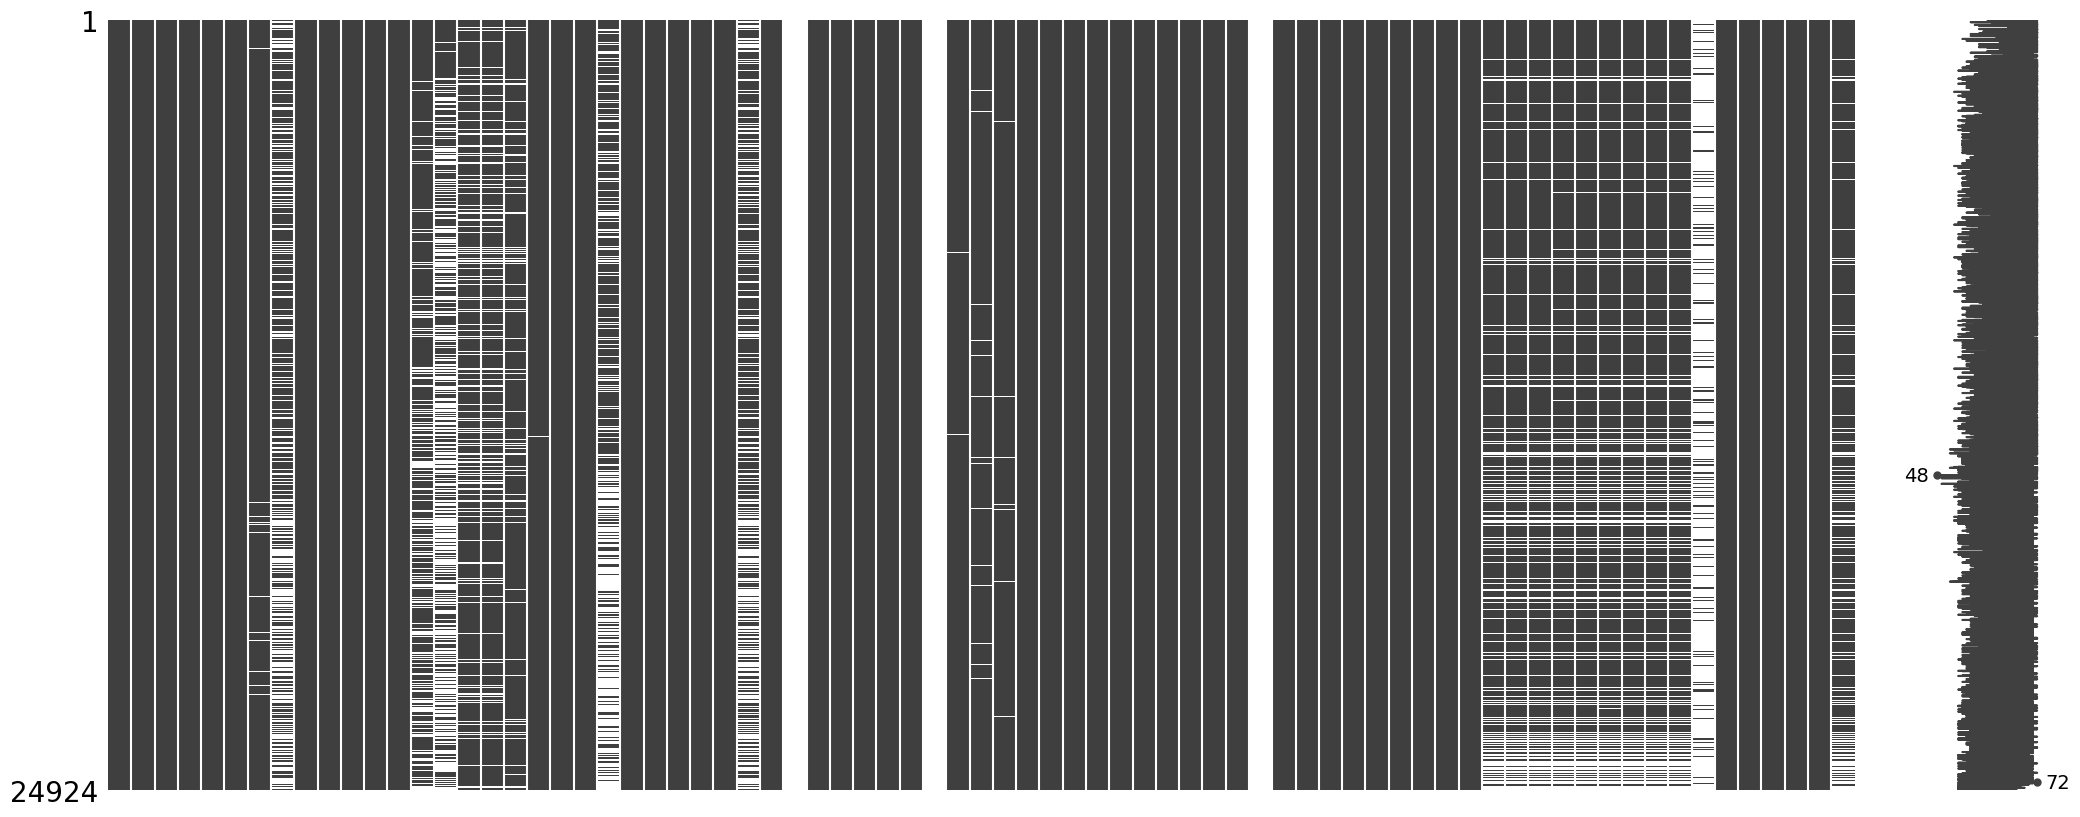

In [11]:
import missingno as msno
msno.matrix(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24924 entries, 0 to 24923
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24924 non-null  int64  
 1   listing_url                                   24924 non-null  object 
 2   scrape_id                                     24924 non-null  int64  
 3   last_scraped                                  24924 non-null  object 
 4   source                                        24924 non-null  object 
 5   name                                          24920 non-null  object 
 6   description                                   24465 non-null  object 
 7   neighborhood_overview                         15266 non-null  object 
 8   picture_url                                   24924 non-null  object 
 9   host_id                                       24924 non-null 

In [31]:
# Number of separate accomodotain units

len(df.index)

24924

In [14]:
# Number of hosts

df['host_id'].nunique()

12935

In [13]:
df_host = df.groupby('host_id').id.count().sort_values(ascending = False).head(100)

In [20]:
df_host.head(55)

host_id
23532561     239
96122546     152
201739458     83
63191555      70
8973851       57
2405376       52
51503378      49
1107433       48
316068        47
45788344      47
230950667     45
224869116     43
1369759       43
4453257       42
206380158     39
20428282      39
13766340      36
1764914       34
4417813       33
24459917      33
115777793     31
94907986      29
16611461      28
6519534       28
20607918      27
55155461      27
256680931     26
13331165      25
57568166      25
10210991      23
494485        23
9549387       22
7024674       22
73484657      22
19178087      21
20968125      21
4495963       21
51977220      21
97409859      21
94052914      21
761827        21
212194733     20
5232802       20
128751678     20
6797602       20
41170239      20
234260176     19
47959968      19
23152582      19
8110338       18
1355106       18
62082327      18
2315268       18
167149840     18
5265232       18
Name: id, dtype: int64

In [53]:

df.loc[df['host_id'] == 23532561].id.count()

239

In [60]:
df[['id', 'host_id', 'name']].loc[df['host_id'] == 23532561]

,id,host_id,name
2244,4539118,23532561,iFlat | Monti secret Garden
2429,4870901,23532561,iFlat | Spanish Steps Studio Apartment
2816,5657500,23532561,Pantheon Cozy Apartment n. 3
2817,5657827,23532561,Pantheon Cozy Apartment n. 2
2819,5658485,23532561,Pantheon Cozy Apartment n. 7
...,...,...,...
24367,824617240772357369,23532561,iFlat | Trastevere Unique Loft
24534,831724047233388666,23532561,iFlat | Vatican Elegant Apartment
24611,839654436113394668,23532561,iFlat | The Carpet Apartment
24612,839689394836536650,23532561,iFlat | The gem of the center


In [50]:
df_host = df[['id', 'host_id', 'name']].sort_values(by = 'host_id')

In [51]:
df_host

,id,host_id,name
5066,11509515,1944,WFP-FAO-ICCROM-BIOVERSITY cute private room
5502,12871422,1944,FAO/WFP/ICCROM/IFAD/UNIV.ROMA 3 single room
5045,11495251,1944,Circo Massimo/Colosseo/St Stephen's school for 4
5261,12269354,1944,Trastevere station cute miniflat
5057,11590562,1944,Colosseo/FAO/St Stephen's school apt sleeps 4
...,...,...,...
24847,843209465774334522,504566419,Casa di Claudia
24844,844035131162045447,504725606,Camera con Vista sulla Cupola di San Pietro
24877,844563379393111428,504749365,Camera da letto Matrimoniale
24810,842643043537458909,505156851,GraccHome Vaticano


In [ ]:
df_host2 = df_host.groupby(['host_id'])['host_id'].count()

In [80]:
df_host2

host_id
1944         7
2353         1
3047         6
3504         5
11756        1
            ..
504566419    1
504725606    1
504749365    1
505156851    1
505209685    1
Name: host_id, Length: 12935, dtype: int64

In [91]:
df_host2.loc[df_host2== 1].count()

9007

In [89]:
df_host2.loc[df_host2 > 1].count()

3928

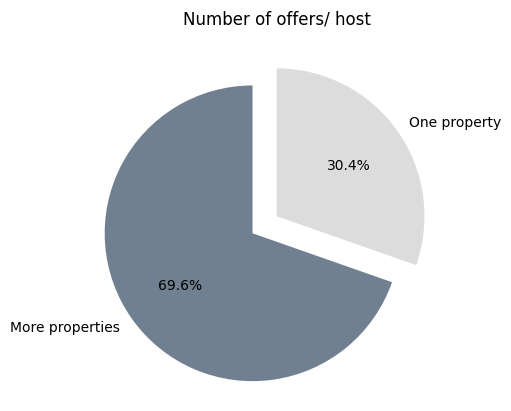

In [92]:
y = np.array([9007, 3928])
mylabels = ["More properties", "One property"]


mycolors = ["slategrey", "gainsboro"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, colors= mycolors, autopct = '%1.1f%%', explode = myexplode, startangle = 90)
plt.title("Number of offers/ host")
plt.show() 